**LEGENDAS do DATASET**

https://docs.google.com/spreadsheets/d/1zy3SmWIvXDF9oGSj5JImGSVb8K7INVlx6UGccNZkoNc/edit?usp=sharing

In [9]:
import pandas as pd


In [10]:
from google.colab import files
uploaded = files.upload()


Saving BRAZIL_CITIES.csv to BRAZIL_CITIES.csv


In [11]:
df = pd.read_csv('/content/BRAZIL_CITIES.csv', delimiter=';')

In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import plotly
import plotly.graph_objects as go
df = pd.read_csv("BRAZIL_CITIES.csv", sep=";", decimal=",")
columns = ['CITY','STATE','CAPITAL','IBGE_RES_POP','AREA','RURAL_URBAN','IDHM','LONG','LAT','ALT','ESTIMATED_POP','GDP','TAXES','GDP_CAPITA','COMP_TOT','MUN_EXPENDIT','GVA_AGROPEC','Wheeled_tractor','IBGE_PLANTED_AREA']
df = df[columns]
df.CAPITAL = df.CAPITAL.replace(0, 'NÃO')
df.CAPITAL = df.CAPITAL.replace(1, 'SIM')
df.MUN_EXPENDIT = df.MUN_EXPENDIT.replace(np.nan, 0)
df.dropna(how ='any', inplace = True)
df.rename(columns={'IBGE_RES_POP': 'POPULATION_2010','ESTIMATED_POP': 'POPULATION_2018','Wheeled_tractor':'WHEELED_TRACTOR','IBGE_PLANTED_AREA': 'PLANTED_AREA'},inplace=True)
df['AREA'] = df['AREA'].apply(lambda n: float(n.replace(',', '')))
df['IDHM'] = df['IDHM'].astype(float)
df['GDP'] = df['GDP'].astype(float)
df['GDP_CAPITA'] = df['GDP_CAPITA'].astype(float)
df['TAXES'] = df['TAXES'].astype(float)
df['LONG'] = df['LONG'].astype(float)
df['LAT'] = df['LAT'].astype(float)
df['LAT'] = df['LAT'].astype(float)
df['PLANTED_AREA'] = df['PLANTED_AREA'].astype(float)
df['GVA_AGROPEC'] = df['GVA_AGROPEC'].astype(float)
NORTE = ['AC', 'AM', 'AP', 'PA', 'RO', 'RR', 'TO']
NORDESTE = ['AL', 'BA', 'CE', 'MA', 'PB', 'PE', 'PI', 'RN', 'SE']
CENTROOESTE = ['DF', 'GO', 'MT', 'MS']
SUDESTE = ['ES', 'MG', 'SP', 'RJ']
SUL = ['PR', 'SC', 'RS']

def conversion_reg(n):
	if n in NORTE:
		return 'NORTE'
	elif n in NORDESTE:
		return 'NORDESTE'
	elif n in CENTROOESTE:
		return 'CENTROOESTE'
	elif n in SUDESTE:
		return 'SUDESTE'
	elif n in SUL:
		return 'SUL'
	else:
		return 'ERROR'
df['REGION'] = df['STATE'].apply(conversion_reg)

In [13]:
df.head(5)

,CITY,STATE,CAPITAL,POPULATION_2010,AREA,RURAL_URBAN,IDHM,LONG,LAT,ALT,POPULATION_2018,GDP,TAXES,GDP_CAPITA,COMP_TOT,MUN_EXPENDIT,GVA_AGROPEC,WHEELED_TRACTOR,PLANTED_AREA,REGION
0,Abadia De Goiás,GO,NÃO,6876.0,147.26,Urbano,0.708,-49.440548,-16.758812,893.6,8583.0,166.41,20554.20,20664.57,284.0,28227691.0,6.20,0.0,319.0,CENTROOESTE
1,Abadia Dos Dourados,MG,NÃO,6704.0,881.06,Rural Adjacente,0.690,-47.396832,-18.487565,753.12,6972.0,180.09,12873.50,25591.70,476.0,17909274.0,50524.57,0.0,4479.0,SUDESTE
2,Abadiânia,GO,NÃO,15757.0,1045.13,Rural Adjacente,0.690,-48.718812,-16.182672,1017.55,19614.0,287984.49,26822.58,15628.40,288.0,37513019.0,42.84,0.0,10307.0,CENTROOESTE
3,Abaeté,MG,NÃO,22690.0,1817.07,Urbano,0.698,-45.446191,-19.155848,644.74,23223.0,430235.36,26994.09,18250.42,621.0,0.0,113824.60,0.0,1862.0,SUDESTE
4,Abaetetuba,PA,NÃO,141100.0,1610.65,Urbano,0.628,-48.884404,-1.723470,10.12,156292.0,1249255.29,95180.48,8222.36,931.0,0.0,140463.72,0.0,25200.0,NORTE


# **Análise Univariada**

[Text(0.5, 0, 'Estados'),
 Text(0, 0.5, 'Produto interno Bruto (PIB) percapita')]

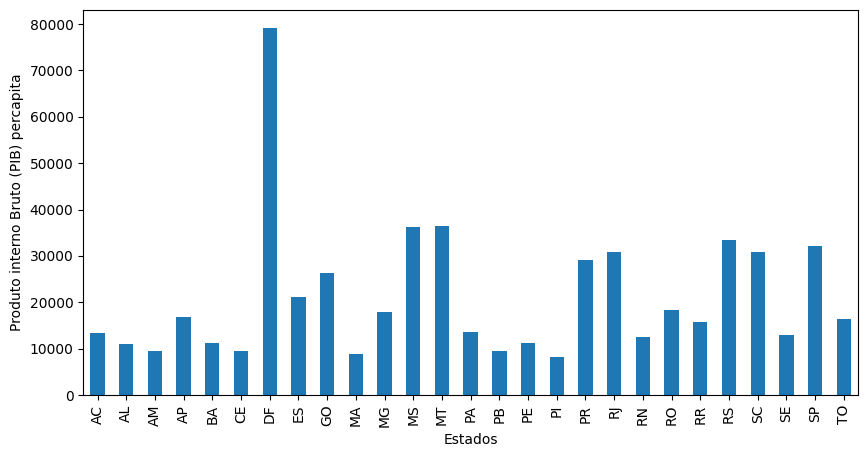

In [14]:
data = df.groupby(by=['STATE'])['GDP_CAPITA'].mean()
ax = data.plot.bar(figsize=(10,5))
ax.set(xlabel='Estados', ylabel='Produto interno Bruto (PIB) percapita')


# **Análise Multivariada**

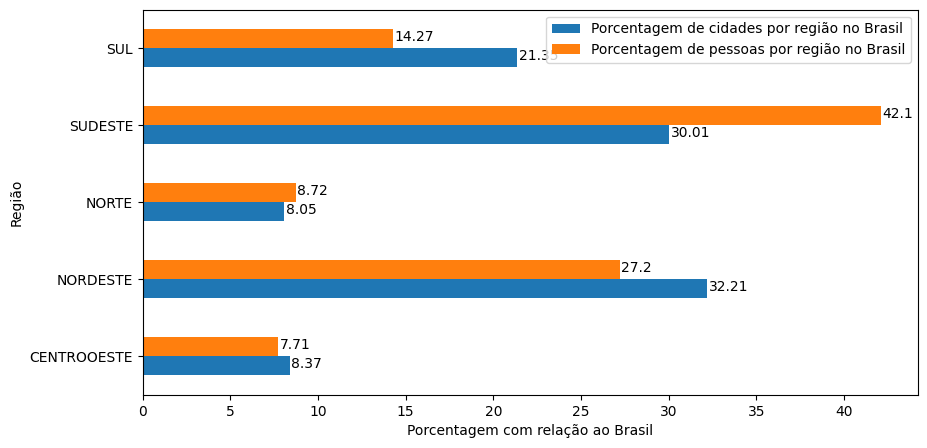

In [15]:
data = df.groupby(by=['REGION']).agg({'CITY': 'count','POPULATION_2018':'sum'})
data['CITY'] = (data['CITY'] / data['CITY'].sum()) * 100
data['POPULATION_2018'] = (data['POPULATION_2018'] / data['POPULATION_2018'].sum()) * 100

ax = data.plot.barh(figsize=(10,5))

for i in ax.patches:
    ax.text(i.get_width() + 0.1, i.get_y() + 0.1, \
            str(round((i.get_width()), 2)), fontsize=10, color='black')

_ = ax.set(xlabel='Porcentagem com relação ao Brasil', ylabel='Região')
_ = ax.legend(['Porcentagem de cidades por região no Brasil', 'Porcentagem de pessoas por região no Brasil'])


# **Gráfico de Setor**

<ipython-input-16-bc37f04cf961>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(by=['REGION']).sum()['TAXES'].plot.pie(colors=colors,
<ipython-input-16-bc37f04cf961>:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  _ = df.groupby(by=['REGION']).sum()['GDP'].plot.pie(colors=colors, autopct='%1.1f%%', ax=axes[1])


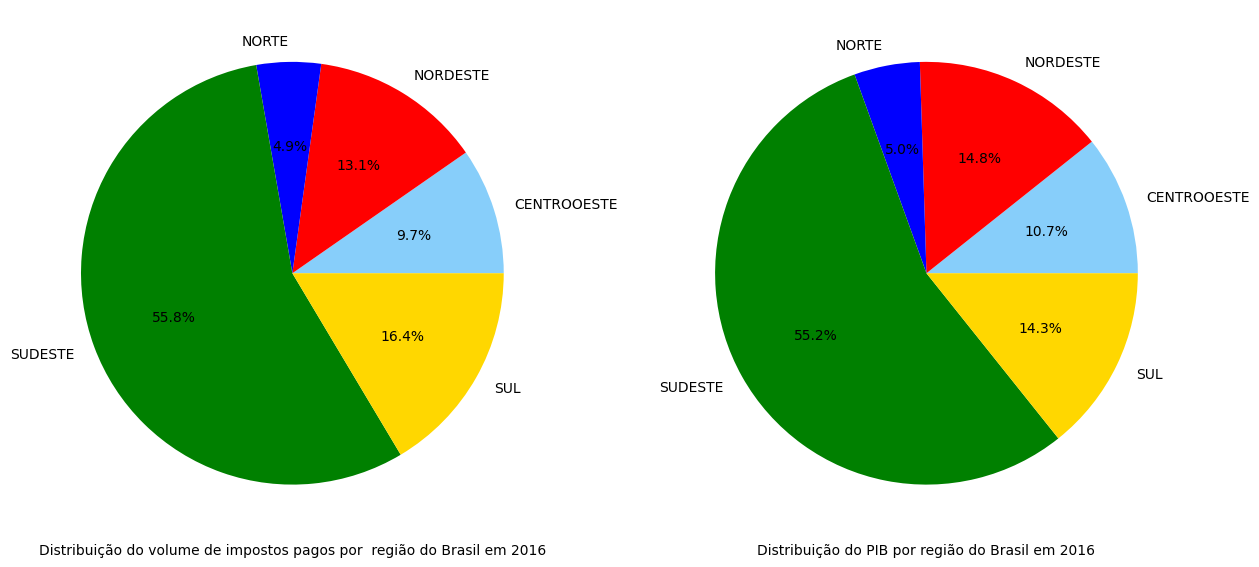

In [16]:
import matplotlib.pyplot as plt
# Especifica a sequência de cores a ser utilizada na visualização
colors = ['lightskyblue', 'red', 'blue', 'green', 'gold']
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 15))
df.groupby(by=['REGION']).sum()['TAXES'].plot.pie(colors=colors,
autopct='%1.1f%%', ax=axes[0])
_ = df.groupby(by=['REGION']).sum()['GDP'].plot.pie(colors=colors, autopct='%1.1f%%', ax=axes[1])
_ = axes[0].set(xlabel='Distribuição do volume de impostos pagos por  região do Brasil em 2016', ylabel='')
_ = axes[1].set(xlabel='Distribuição do PIB por região do Brasil em 2016',  ylabel='')

# **[Gráficos de Dispersão]**





***Análise Bivariada***

Text(0, 0.5, 'Gastos do município')

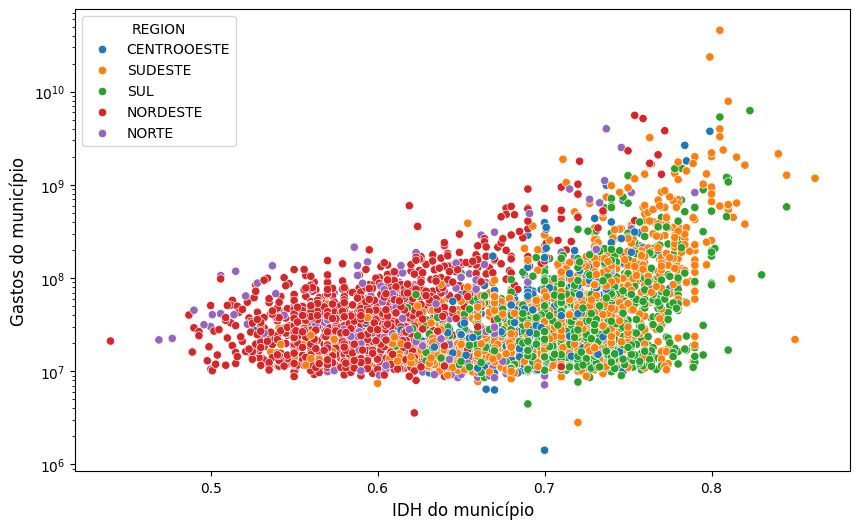

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
# O valor de despesas de alguns municípios não foi disponibilizado na base de dados
data = df.query("MUN_EXPENDIT != 0")
f, ax = plt.subplots(figsize=(10, 6))
plt.yscale('log')
sct_plot = sns.scatterplot(x=data['IDHM'],y=data['MUN_EXPENDIT'],hue=data['REGION'])
sct_plot.set_xlabel(xlabel = 'IDH do município', fontsize = 12)
sct_plot.set_ylabel(ylabel = 'Gastos do município', fontsize = 12)

<ipython-input-18-4d4eb68fe080>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['MUN_EXPENDIT_Millions'] = data['MUN_EXPENDIT'] / 10000000000


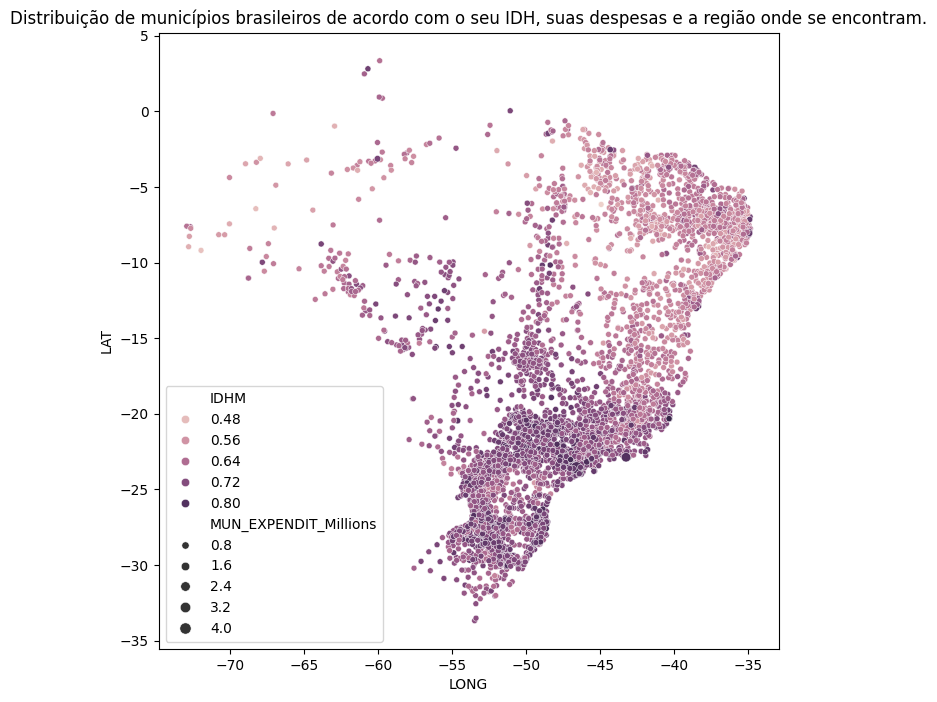

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

data['MUN_EXPENDIT_Millions'] = data['MUN_EXPENDIT'] / 10000000000

f, ax = plt.subplots(figsize=(8, 8))
sns.scatterplot(x=data.LONG, y=data.LAT, hue=data['IDHM'], size=data['MUN_EXPENDIT_Millions'])
_ = plt.title("Distribuição de municípios brasileiros de acordo com o seu IDH, suas despesas e a região onde se encontram.")

***Análise Multivariada***

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


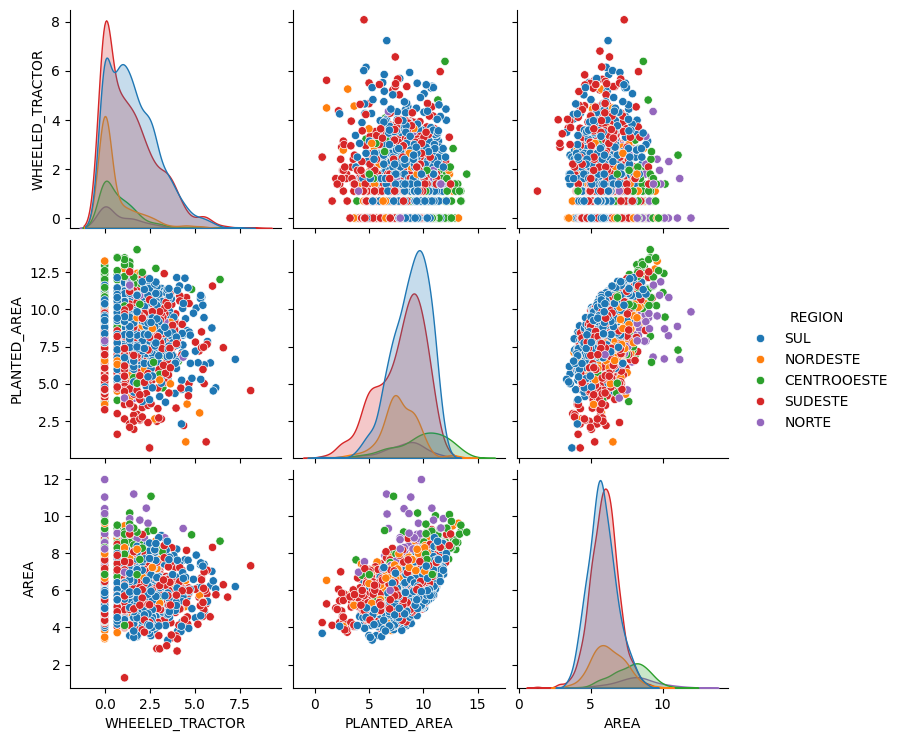

In [19]:
df2 = df[['WHEELED_TRACTOR', 'PLANTED_AREA', 'AREA', 'REGION']]
# Para filtrar municípios sem tratores registrados
df2 = df2[df2['WHEELED_TRACTOR'] != 0]
df2['WHEELED_TRACTOR'] = np.log(df2['WHEELED_TRACTOR'])
df2['PLANTED_AREA'] = np.log(df2['PLANTED_AREA'])
df2['AREA'] = np.log(df2['AREA'])
_ = sns.pairplot(df2, hue="REGION")

# **Gráfico de Linhas**

<ipython-input-20-21af82edcebd>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data = df.groupby('STATE').sum()[['POPULATION_2010','POPULATION_2018']]


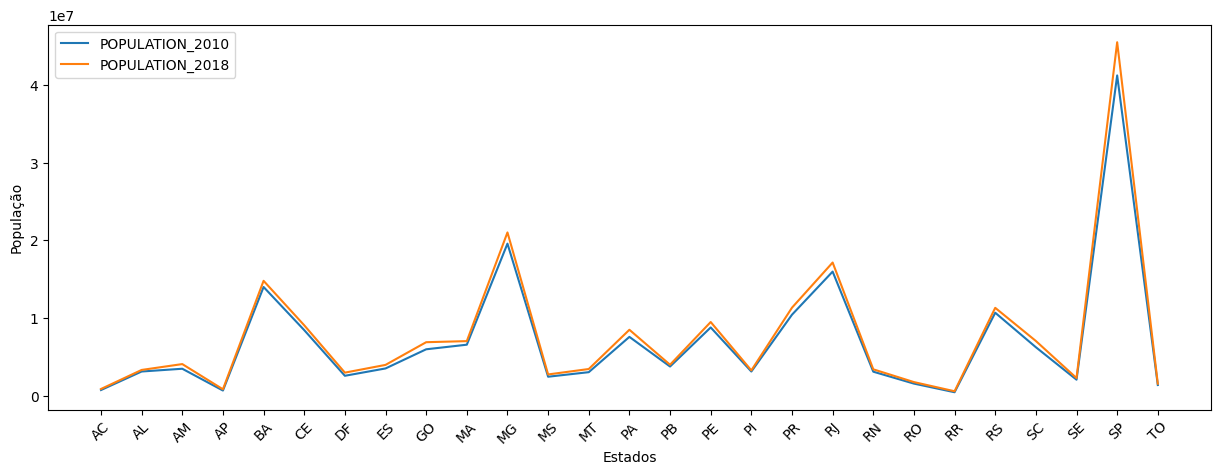

In [20]:
import matplotlib.pyplot as plt
data = df.groupby('STATE').sum()[['POPULATION_2010','POPULATION_2018']]
plot = data.plot.line(figsize=(15,5))
_ = plt.xticks(range(0,len(data.index)), labels=data.index, rotation=45)
_ = plot.set(xlabel='Estados', ylabel='População')

# **Gráfico de Radar**

In [21]:
import plotly.graph_objects as go
data = df.groupby(by=['REGION']).agg({'CITY': 'count', 'POPULATION_2018': 'sum', 'AREA': 'sum', 'GDP': 'sum', 'COMP_TOT': 'sum','TAXES': 'sum'})
# Colocando os valores individuais em proporção do valor total
for col in data.columns:
  data[col] = data[col] / sum(data[col])
fig = go.Figure(
  data=[go.Scatterpolar(r=data.values[0], theta=data.columns,fill='toself',
    name=data.index[0]),
    go.Scatterpolar(r=data.values[1], theta=data.columns,
    fill='toself',
    name=data.index[1]),
    go.Scatterpolar(r=data.values[2], theta=data.columns,
    fill='toself',
    name=data.index[2]),
    go.Scatterpolar(r=data.values[3], theta=data.columns,
    fill='toself',
    name=data.index[3]),
    go.Scatterpolar(r=data.values[4], theta=data.columns,
    fill='toself',
    name=data.index[4])],
    layout=go.Layout(
    polar={'radialaxis': {'visible': True}},
    showlegend=True
)
)
fig.show()

# **Gráfico de Histograma**

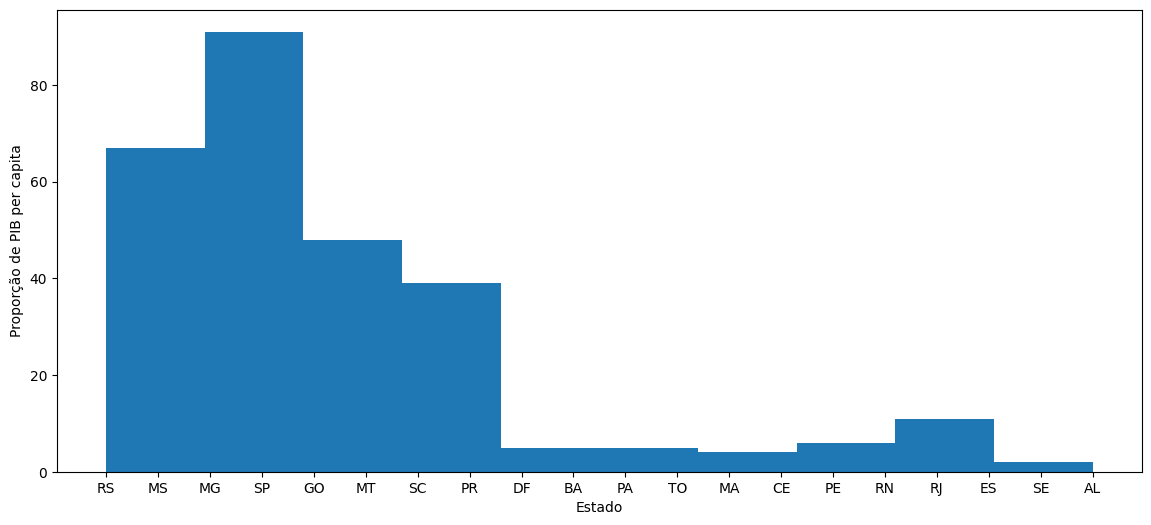

In [22]:
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(14, 6))
filtro = df['GDP_CAPITA'] > df['GDP_CAPITA'].quantile(0.95)
ax = df[filtro]['STATE'].hist(histtype='bar', grid=False)
_ = ax.set(xlabel='Estado', ylabel='Proporção de PIB per capita')

# **Gráfico de BoxPlot**

Text(0.5, 0.98, '')

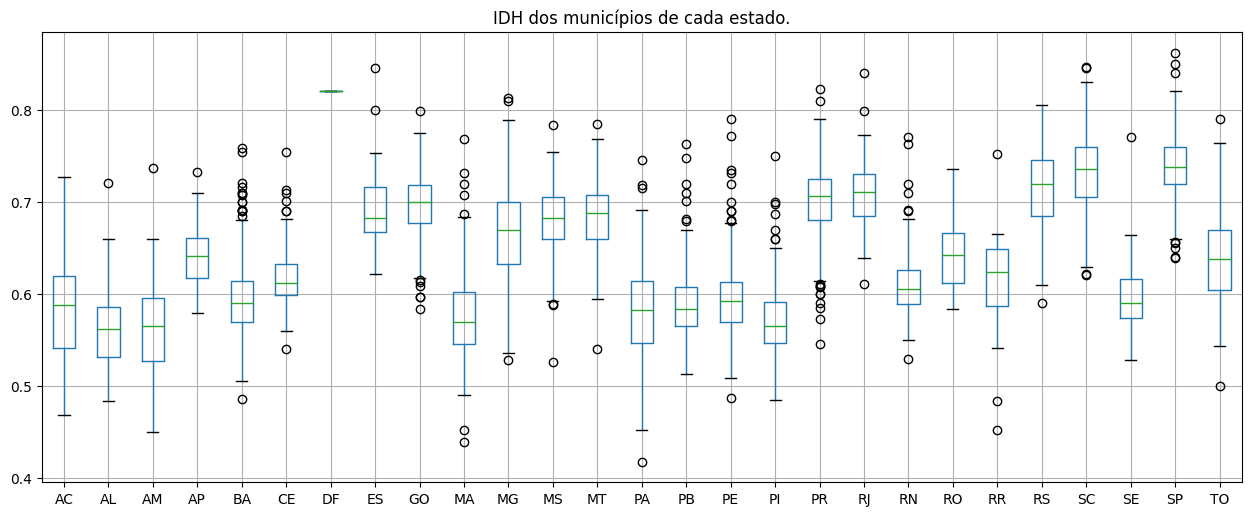

In [23]:
import matplotlib.pyplot as plt
ax = df.boxplot(column='IDHM', by='STATE', figsize=(15,6))
_ = ax.set(xlabel='', ylabel='')
plt.title('IDH dos municípios de cada estado.')
plt.suptitle('')

# **Gráfico de ViolinPlot**

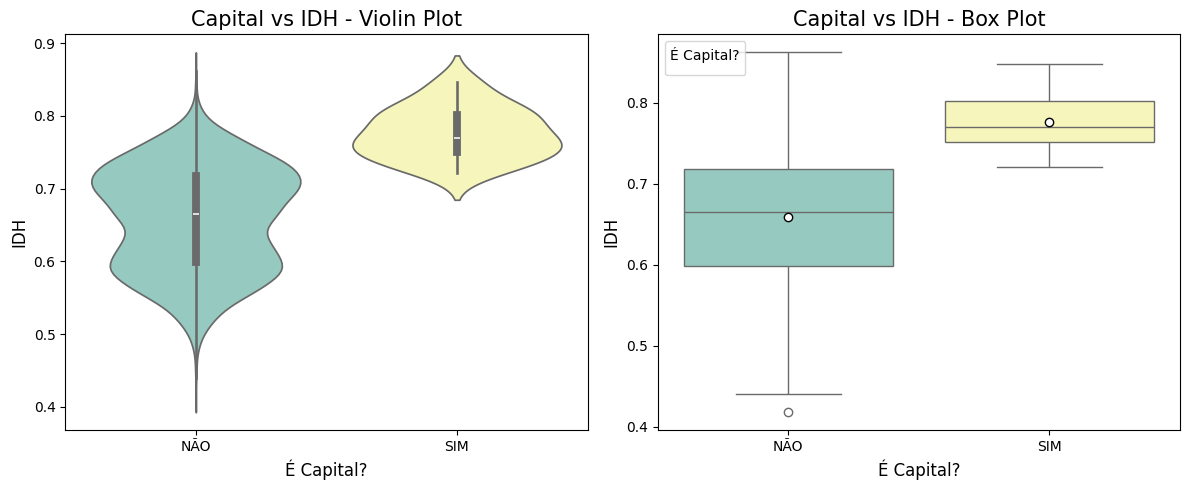

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

violin_hdi = sns.violinplot(x='CAPITAL', y='IDHM', data=df, palette="Set3", hue='CAPITAL', ax=axes[0], legend=False)
violin_hdi.set_xlabel(xlabel='É Capital?', fontsize=12)
violin_hdi.set_ylabel(ylabel='IDH', fontsize=12)
violin_hdi.set_title(label='Capital vs IDH - Violin Plot', fontsize=15)

box_hdi = sns.boxplot(x='CAPITAL', y='IDHM', data=df, palette="Set3", hue='CAPITAL', ax=axes[1], showmeans=True, meanprops={"marker":"o","markerfacecolor":"white","markeredgecolor":"black"})
box_hdi.set_xlabel(xlabel='É Capital?', fontsize=12)
box_hdi.set_ylabel(ylabel='IDH', fontsize=12)
box_hdi.set_title(label='Capital vs IDH - Box Plot', fontsize=15)

plt.legend(title='É Capital?', loc='upper left')
plt.tight_layout()
plt.show()


# **Nuvens de Palavras**

(-0.5, 599.5, 299.5, -0.5)

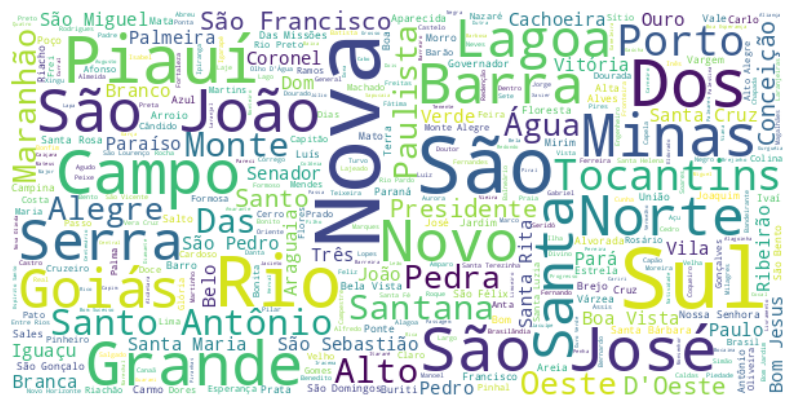

In [25]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
text = ' '.join(df['CITY'])
# Remoção de palavras repetidas irrelevantes
stop_words = ['De', 'Do', 'Da']
# Mapeamento da frequência de cada palavra e produção da nuvem de palavras
wordcloud = WordCloud(background_color="white",
max_words=len(df), max_font_size=70, stopwords=stop_words, height=300, width=600).generate(text)
plt.figure(figsize=(10,12))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")

# **Mapas de Calor**

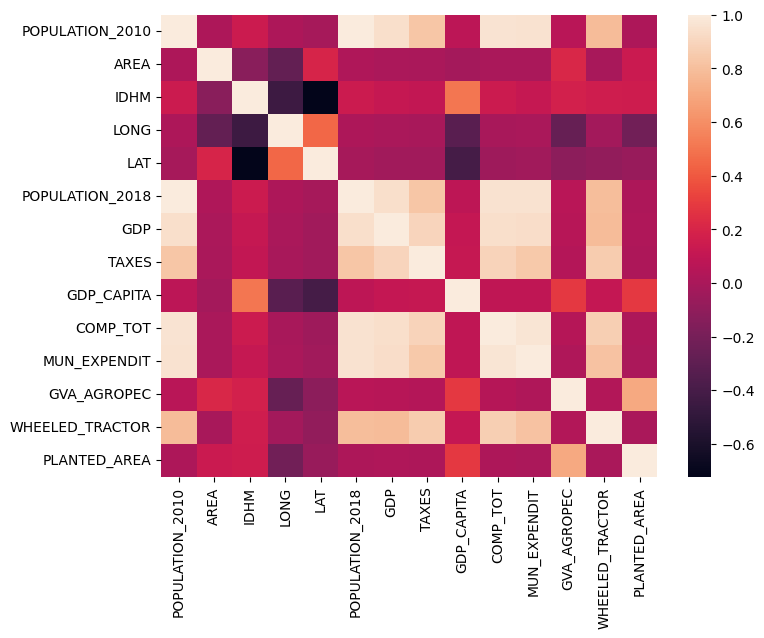

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Selecionando apenas as colunas numéricas
numeric_columns = df.select_dtypes(include=['float64', 'int64'])

f, ax = plt.subplots(figsize=(8, 6))
ax = sns.heatmap(numeric_columns.corr())


# **ATIVIDADES (5 QUESTOES)**

In [27]:
df.head(10)

,CITY,STATE,CAPITAL,POPULATION_2010,AREA,RURAL_URBAN,IDHM,LONG,LAT,ALT,POPULATION_2018,GDP,TAXES,GDP_CAPITA,COMP_TOT,MUN_EXPENDIT,GVA_AGROPEC,WHEELED_TRACTOR,PLANTED_AREA,REGION
0,Abadia De Goiás,GO,NÃO,6876.0,147.26,Urbano,0.708,-49.440548,-16.758812,893.6,8583.0,166.41,20554.20,20664.57,284.0,28227691.0,6.20,0.0,319.0,CENTROOESTE
1,Abadia Dos Dourados,MG,NÃO,6704.0,881.06,Rural Adjacente,0.690,-47.396832,-18.487565,753.12,6972.0,180.09,12873.50,25591.70,476.0,17909274.0,50524.57,0.0,4479.0,SUDESTE
2,Abadiânia,GO,NÃO,15757.0,1045.13,Rural Adjacente,0.690,-48.718812,-16.182672,1017.55,19614.0,287984.49,26822.58,15628.40,288.0,37513019.0,42.84,0.0,10307.0,CENTROOESTE
3,Abaeté,MG,NÃO,22690.0,1817.07,Urbano,0.698,-45.446191,-19.155848,644.74,23223.0,430235.36,26994.09,18250.42,621.0,0.0,113824.60,0.0,1862.0,SUDESTE
4,Abaetetuba,PA,NÃO,141100.0,1610.65,Urbano,0.628,-48.884404,-1.723470,10.12,156292.0,1249255.29,95180.48,8222.36,931.0,0.0,140463.72,0.0,25200.0,NORTE
5,Abaiara,CE,NÃO,10496.0,180.08,Rural Adjacente,0.628,-39.047547,-7.356977,403.11,11663.0,73151.46,4042.79,6370.41,86.0,0.0,4435.16,0.0,2598.0,NORDESTE
6,Abaíra,BA,NÃO,8316.0,538.68,Rural Remoto,0.603,-41.661608,-13.253532,674.22,8767.0,64324.59,2019.77,6982.70,191.0,0.0,12.41,0.0,895.0,NORDESTE
7,Abaré,BA,NÃO,17064.0,1604.92,Rural Remoto,0.575,-39.116588,-8.723418,316.38,19814.0,124754.26,6.21,6256.80,87.0,0.0,9176.40,0.0,2058.0,NORDESTE
8,Abatiá,PR,NÃO,7764.0,228.72,Rural Adjacente,0.687,-50.312527,-23.300494,579.3,7507.0,165048.21,5.77,21173.60,285.0,0.0,73340.52,0.0,1197.0,SUL
9,Abdon Batista,SC,NÃO,2653.0,237.16,Rural Adjacente,0.690,-51.025272,-27.608987,720.98,2577.0,64742.01,2312.65,24739.02,69.0,19506956.0,24996.75,2.0,5502.0,SUL


## Escolha o plot apropiado para visualizar a proporção entre a participação de cada valor único da coluna RURAL_URBAN para composição do valor total da coluna AREA

8423739.46


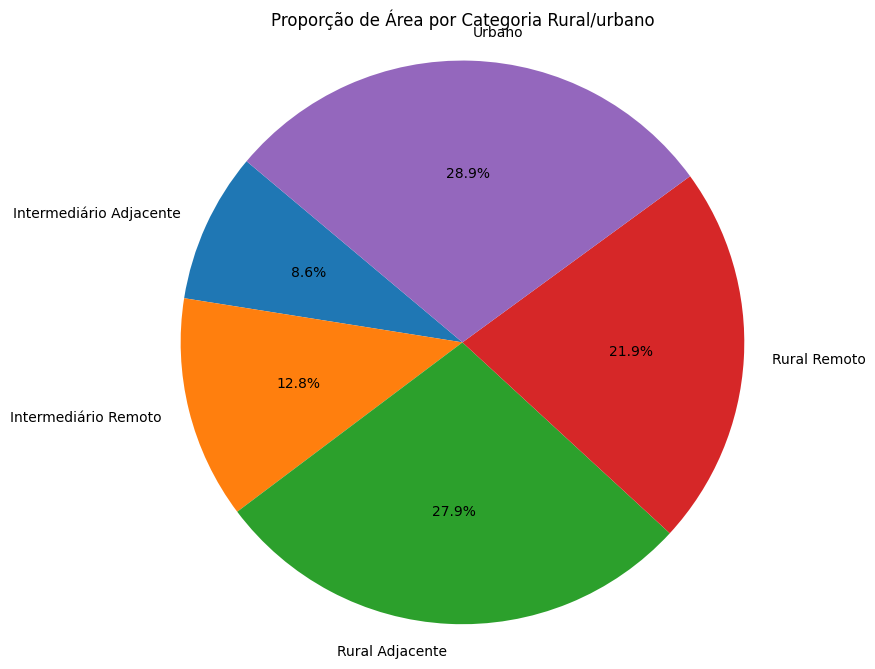

In [28]:
import matplotlib.pyplot as plt

total_area = df['AREA'].sum()

print(total_area)

proporcoes = df.groupby('RURAL_URBAN')['AREA'].sum() / total_area

plt.figure(figsize=(8, 8))
plt.pie(proporcoes, labels=proporcoes.index, autopct='%1.1f%%', startangle=140)
plt.title('Proporção de Área por Categoria Rural/urbano')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


## Escolha o plot apropiado para visualizar a correlação entre as colunas POPULATION_2010, POPULATION-2018 e GDP

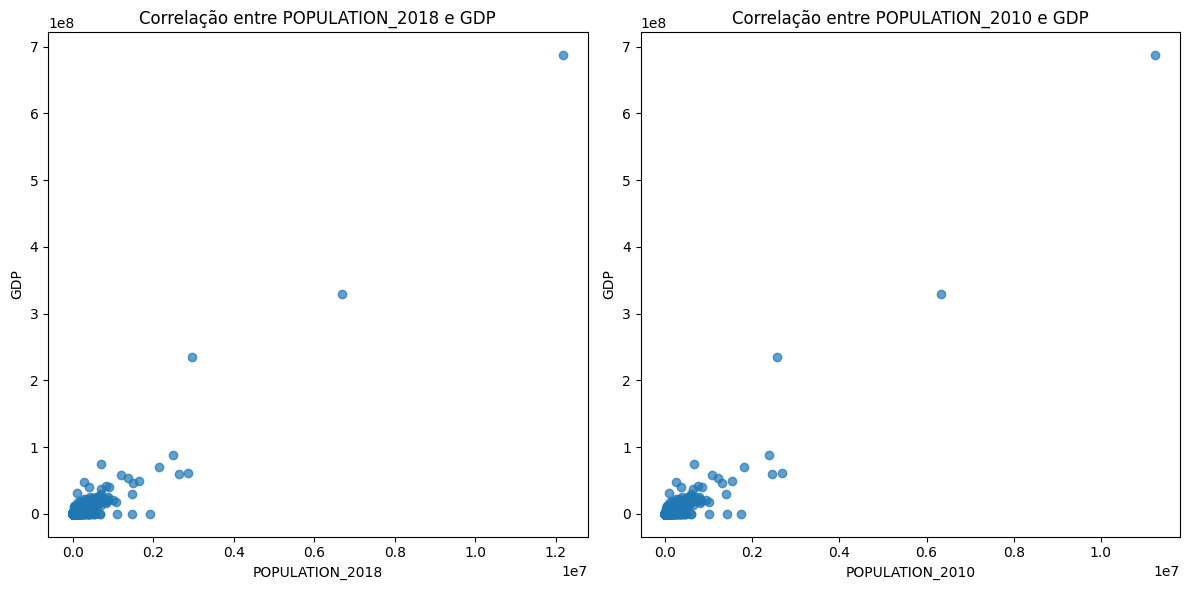

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(df['POPULATION_2018'],df['GDP'], alpha=0.7)
plt.title('Correlação entre POPULATION_2018 e GDP')
plt.xlabel('POPULATION_2018')
plt.ylabel('GDP')

plt.subplot(1, 2, 2)
plt.scatter(df['POPULATION_2010'], df['GDP'], alpha=0.7)
plt.title('Correlação entre POPULATION_2010 e GDP')
plt.xlabel('POPULATION_2010')
plt.ylabel('GDP')

plt.tight_layout()
plt.show()

## Escolha o plot apropiado para visualizar a comparação entre as colunas GDP de acordo com cada região (coluna STATE)

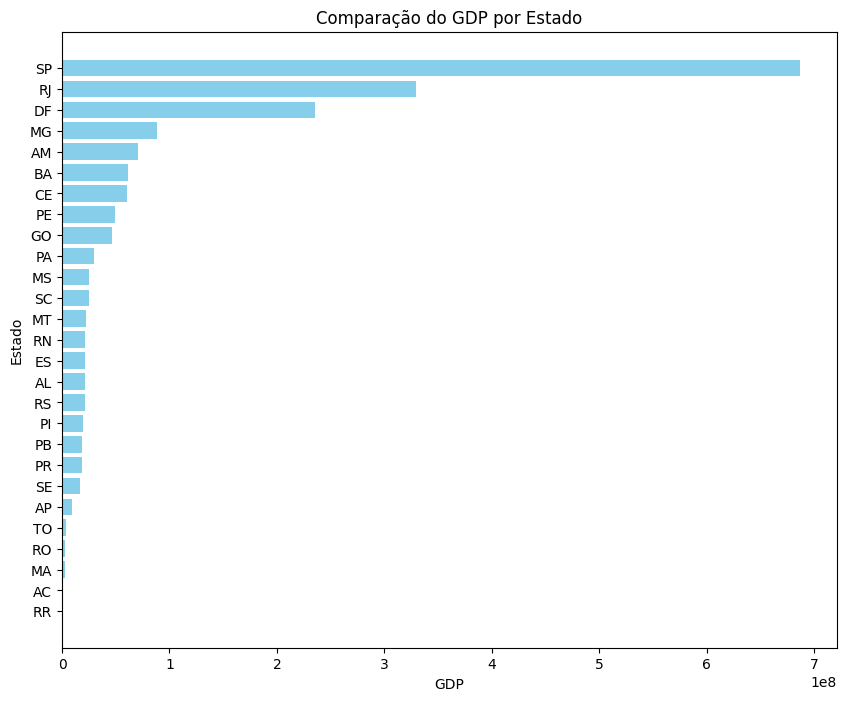

In [30]:
import matplotlib.pyplot as plt

# Ordenar os dados por GDP

df_sorted = df.sort_values(by='GDP', ascending=False)


plt.figure(figsize=(10, 8))
plt.barh(df_sorted['STATE'], df_sorted['GDP'], color='skyblue')
plt.xlabel('GDP')
plt.ylabel('Estado')
plt.title('Comparação do GDP por Estado')
plt.gca().invert_yaxis()  # Inverter o eixo y para ter o maior GDP no topo
plt.show()


## Escolha o plot apropiado para visualizar a distribuição dos municipios (coluna CITY) de acordo apenas com latitude (coluna LAT) e longitude (coluna LONG)

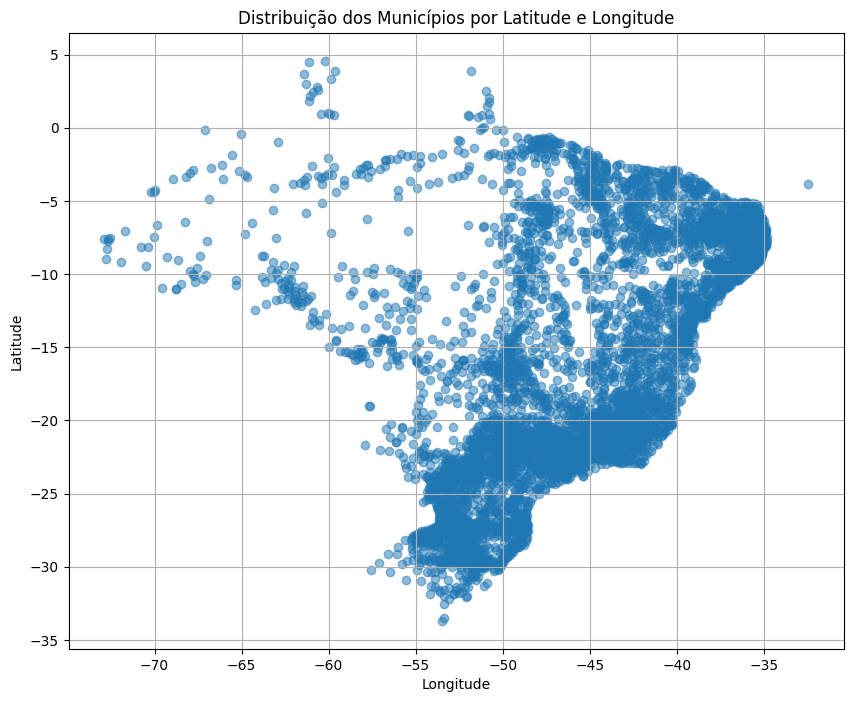

In [31]:
import matplotlib.pyplot as plt

## Utilização de um gráfico de dispersão.
plt.figure(figsize=(10, 8))
plt.scatter(df['LONG'], df['LAT'], alpha=0.5)
plt.title('Distribuição dos Municípios por Latitude e Longitude')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()


## Escolha o plot apropiado para visualizar as palavras (e sua quantidade de ocorrências) presentes na coluna STATE

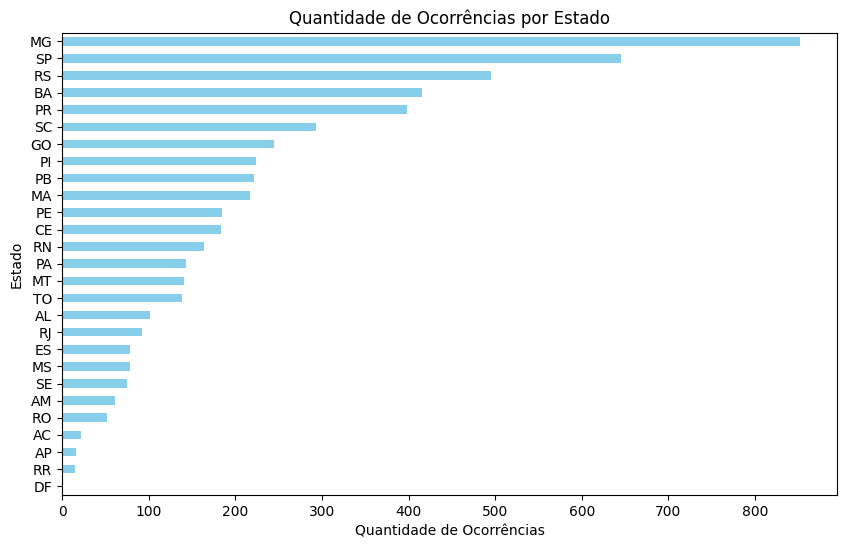

In [34]:
import matplotlib.pyplot as plt

# Contar a ocorrência de cada estado na coluna STATE
contagem_estados = df['STATE'].value_counts()

# Criar o gráfico de barras horizontais
plt.figure(figsize=(10, 6))
contagem_estados.plot(kind='barh', color='skyblue')
plt.xlabel('Quantidade de Ocorrências')
plt.ylabel('Estado')
plt.title('Quantidade de Ocorrências por Estado')
plt.gca().invert_yaxis()
plt.show()
